# Netwoks in different connectivty (g):
This notebook will set networks side by side which are different in the connectivity constant "g".
This procedure will be done with the help of engine code in __network_simulation.py__ file. It contains network object and serves its behaviours.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas() #This line make sure that the progress bars looks natural.

In [3]:
from network_simulation import Rotational_neural_network

In [4]:
num_neurons = 10000
total_time = 1000

In [5]:
connectivity_min,connectivity_max, connectivity_step =10,50, 2
connectivity_span = np.arange(connectivity_min,connectivity_max,connectivity_step)
num_ensembles_each_g = 2
sync_param_record = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g) )
sigma_record = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g) )
neurons_mean_spiking_period = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g,num_neurons) )

## Creating various ensembles:

In [6]:
for i,connectivity in enumerate(tqdm( connectivity_span , desc='Variation of connectivities') ):
    for j in tqdm( range(num_ensembles_each_g) , desc='Making ensembles'):
        sample_model = Rotational_neural_network(num_neurons=num_neurons,g=connectivity)
        sample_model.ignite(total_time = total_time)
        # sample_model.compute_effective_field( alpha = 20)
        sync_param_record[i][j] = sample_model.report_sync_parameter()
        sigma_record[i][j] = sample_model.report_sigma()
        neurons_mean_spiking_period[i][j] = sample_model.report_spikies_period_mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


network dynamic:   0%|                                                                       | 0/99999 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:03<00:00, 1586.42it/s]
C:\Users\mohsen\Documents\Master journey\master_thesis\scripts\rotational_model\network_simulation.py:121: RuntimeWarning: invalid value encountered in true_divide
  self.spikies_period_mean = self.total_spikes_intervals * self.time_step / self.total_spikes_num
network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:07<00:00, 1487.30it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:08<00:00, 1462.49it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:09<00:00, 1438.48it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:12<00:00, 1386.34it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:18<00:00, 1275.94it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:12<00:00, 1372.24it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:15<00:00, 1327.14it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:02<00:00, 1612.35it/s]

network dynamic: 100%|██████████████████████████████████████████████████████████| 99999/99999 [01:41<00:00, 982.54it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:31<00:00, 1095.76it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:36<00:00, 1035.78it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:36<00:00, 1037.20it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:34<00:00, 1055.45it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:27<00:00, 1145.02it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:26<00:00, 1156.48it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:19<00:00, 1254.07it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:20<00:00, 1245.82it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:21<00:00, 1225.80it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:19<00:00, 1261.66it/s]

network dynamic: 100%|█████████████████████████████████████████████████████████| 99999/99999 [01:16<00:00, 1307.88it/s]

## Results saving unit

In [7]:
path = 'ensembles/N{}_T{}_g_{}_{}_{}'.format(num_neurons,total_time,connectivity_min,connectivity_max,connectivity_step)
try:
    os.makedirs(path)
except:
    pass

In [8]:
# sigma_record = connectivity_record
np.save(os.path.join(path,'sync_param_records.npy'), sync_param_record)
np.save(os.path.join(path,'sigma_records.npy'), sigma_record)
np.save(os.path.join(path,'neurons_mean_spiking_period.npy'), neurons_mean_spiking_period)

## Brief data evaluation

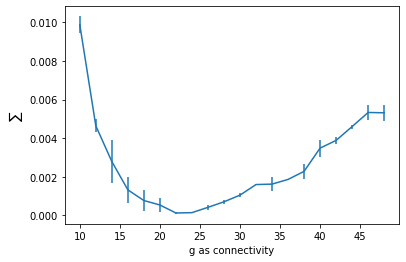

In [9]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = connectivity_span, y = np.mean(sync_param_record,axis = 1),yerr = np.var(sync_param_record,axis = 1)**(0.5))
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sum \frac{sin\theta_i}{N}$')
fig.savefig(os.path.join(path, 'synchoronization.png'))

In [10]:
np.sum(sync_param_record,axis = 0)

array([0.05339443, 0.05118404])

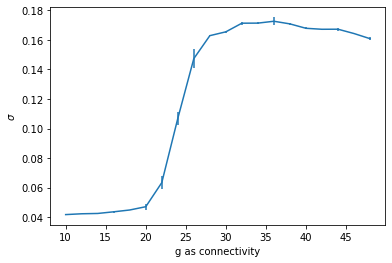

In [11]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = connectivity_span, y = np.mean(sigma_record,axis = 1),yerr = np.var(sigma_record,axis = 1)**(0.5))
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig(os.path.join(path, 'sigma_as_synchoronization_meter.png'))